## Step 1: Importing all the necessary libraries



In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.express as px
import random

##Step 2 : Use Kaggle API to download the dataset from Kaggle directly on the Colab Platform


Please provide your Kaggle API credentials i.e Kaggle's username and Kaggle's key to directly import the dataset from the Kaggle platform. For testing purpose, given below are the credentials for my test account


In [2]:
#Enter your Kaggle's username on the 'KAGGLE_USERNAME' and Kaggle's key on the 'KAGGLE_KEY'
os.environ['KAGGLE_USERNAME']='learninginnovation'
os.environ['KAGGLE_KEY']='164ee06096a9108c3fe99d8b25025411'

In [3]:
# Downloads the Multi Cancer dataset from Kaggle directly to the Colab
! kaggle datasets download -d obulisainaren/multi-cancer

100% 8.62G/8.62G [07:17<00:00, 23.4MB/s]
100% 8.62G/8.62G [07:17<00:00, 21.2MB/s]


In [4]:
#unzip the multi cancer dataset folder
! unzip multi-cancer.zip

Streaming output truncated to the last 5000 lines.
  inflating: Multi Cancer/Oral Cancer/oral_scc/oral_scc_0002.jpg  
  inflating: Multi Cancer/Oral Cancer/oral_scc/oral_scc_0003.jpg  
  inflating: Multi Cancer/Oral Cancer/oral_scc/oral_scc_0004.jpg  
  inflating: Multi Cancer/Oral Cancer/oral_scc/oral_scc_0005.jpg  
  inflating: Multi Cancer/Oral Cancer/oral_scc/oral_scc_0006.jpg  
  inflating: Multi Cancer/Oral Cancer/oral_scc/oral_scc_0007.jpg  
  inflating: Multi Cancer/Oral Cancer/oral_scc/oral_scc_0008.jpg  
  inflating: Multi Cancer/Oral Cancer/oral_scc/oral_scc_0009.jpg  
  inflating: Multi Cancer/Oral Cancer/oral_scc/oral_scc_0010.jpg  
  inflating: Multi Cancer/Oral Cancer/oral_scc/oral_scc_0011.jpg  
  inflating: Multi Cancer/Oral Cancer/oral_scc/oral_scc_0012.jpg  
  inflating: Multi Cancer/Oral Cancer/oral_scc/oral_scc_0013.jpg  
  inflating: Multi Cancer/Oral Cancer/oral_scc/oral_scc_0014.jpg  
  inflating: Multi Cancer/Oral Cancer/oral_scc/oral_scc_0015.jpg  
  inflating

##Step 3 : Distribution of the data & Splitting the data into training and testing sets

In [5]:
#counts the total number of images in the normal kidney folder
total_normal_kidney_files = len(os.listdir("/content/Multi Cancer/Kidney Cancer/kidney_normal/"))
#counts the total number of images in the tumor kidney folder
total_tumor_kidney_files= len(os.listdir("/content/Multi Cancer/Kidney Cancer/kidney_tumor/"))

In [6]:
#bar graph shows the distribution of data for the total number of files present in the dataset
bar_graph = px.bar(x=['Normal Kidney', 'Tumor Kidney'], y=[total_normal_kidney_files, total_tumor_kidney_files],labels={'x': 'Types', 'y': 'Total images'},
title='Bar graph for total number of files present in the dataset'
)
bar_graph.update_traces(marker_color=['rgb(255, 255, 0)', 'rgb(204, 0, 0)'])

bar_graph.show()

Since the dataset initially is not splitted into training,testing and validation sets, our initial goal is to split the structure of the dataset

In [7]:
#Below code splits the total number of normal kidney and tumor kidney files into 80:20 ratio for training set and testing set
train_normal_kidney = int(0.8*total_normal_kidney_files)     # 80% for training set in normal kidney class
train_tumor_kidney= int(0.8*total_tumor_kidney_files)        # 80% for training set in tumor kidney class
test_normal_kidney=int(0.2*total_normal_kidney_files)        # 20% for testing set in normal kidney class
test_tumor_kidney=int(0.2*total_tumor_kidney_files)          # 20% for testing set in tumor kidney class

In [8]:
#bar graph shows the distribution of data in different sets i.e training_normal, training_tumor, testing_normal and testing_tumor
bar_graph_train_test = px.bar(x=['Training set- Normal Kidney','Training set- Tumor Kidney','Testing set- Normal Kidney','Testing set- Tumor Kidney'], y=[train_normal_kidney, train_tumor_kidney,test_normal_kidney,test_tumor_kidney],labels={'x': 'Training & Testing Sets', 'y': 'Total images'},
title='Bar graph for total number of files present in each training and testing dataset'
)
bar_graph_train_test.update_traces(marker_color=['rgb(204, 0, 0)', 'rgb(204, 0, 0)'])
bar_graph_train_test.show()

In [9]:
# The below code creates a parent directory called "Kidney Cancer" followed by creating sub directories named 'Train' and 'Test'. Each 'Train' and 'Test' folder then contains two child sub directories called 'kidney_normal' and 'kidney_tumor'

parentDir = "Kidney Cancer"
subDirs = ["Train", "Test"]
childDirs = ["kidney_normal", "kidney_tumor"]

# Below code creates a parent directory called "Kidney Cancer"
if not os.path.exists(parentDir):
    os.mkdir(parentDir)

# Below code creates the subdirectories named Train and Test
for sub in subDirs:
    subPath = os.path.join(parentDir, sub)
    if not os.path.exists(subPath):
        os.mkdir(subPath)

# Below code creates two child sub directories named kidney_normal and kidney_tumor within each subdirectory- Train and Test
    for child in childDirs:
        child_path = os.path.join(subPath, child)
        if not os.path.exists(child_path):
            os.mkdir(child_path)

train_dir = os.path.join(parentDir,'Train')
test_dir = os.path.join(parentDir,'Test')
train_normal_dir = os.path.join(train_dir,'kidney_normal')
train_tumor_dir = os.path.join(train_dir,'kidney_tumor')


In [10]:
#save images from old directory to the newly created parent directory in a splitted manner
for dirName in childDirs:
  for increment in range(1,train_normal_kidney+1):
    imageNum = f"{increment:04}"
    img = Image.open("/content/Multi Cancer/Kidney Cancer/"+dirName+"/"+dirName+"_"+str(imageNum)+".jpg")
    image = img.save(train_dir+"/"+dirName+"/"+dirName+"_"+str(imageNum)+".jpg")


for dirName in childDirs:
  for increment in range(4001,total_normal_kidney_files+1):
    img2 =Image.open("/content/Multi Cancer/Kidney Cancer/"+dirName+"/"+dirName+"_"+str(increment)+".jpg")
    image = img2.save(test_dir+"/"+dirName+"/"+dirName+"_"+str(increment)+".jpg")

In [11]:
#list few names of the files from the training dataset for each of the classes
train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

train_tumor_names = os.listdir(train_tumor_dir)
print(train_tumor_names[:10])

['kidney_normal_2741.jpg', 'kidney_normal_1041.jpg', 'kidney_normal_0002.jpg', 'kidney_normal_3505.jpg', 'kidney_normal_2780.jpg', 'kidney_normal_2782.jpg', 'kidney_normal_2906.jpg', 'kidney_normal_2872.jpg', 'kidney_normal_0766.jpg', 'kidney_normal_3727.jpg']
['kidney_tumor_1491.jpg', 'kidney_tumor_2265.jpg', 'kidney_tumor_1316.jpg', 'kidney_tumor_3176.jpg', 'kidney_tumor_3408.jpg', 'kidney_tumor_0038.jpg', 'kidney_tumor_2389.jpg', 'kidney_tumor_1742.jpg', 'kidney_tumor_3815.jpg', 'kidney_tumor_1727.jpg']


## Step 4 : Data Visualization

['Kidney Cancer/Train/kidney_normal/kidney_normal_0849.jpg', 'Kidney Cancer/Train/kidney_normal/kidney_normal_0211.jpg', 'Kidney Cancer/Train/kidney_normal/kidney_normal_3423.jpg', 'Kidney Cancer/Train/kidney_normal/kidney_normal_1577.jpg', 'Kidney Cancer/Train/kidney_normal/kidney_normal_1013.jpg', 'Kidney Cancer/Train/kidney_normal/kidney_normal_2292.jpg', 'Kidney Cancer/Train/kidney_normal/kidney_normal_1060.jpg', 'Kidney Cancer/Train/kidney_normal/kidney_normal_0503.jpg', 'Kidney Cancer/Train/kidney_tumor/kidney_tumor_0744.jpg', 'Kidney Cancer/Train/kidney_tumor/kidney_tumor_1765.jpg', 'Kidney Cancer/Train/kidney_tumor/kidney_tumor_2174.jpg', 'Kidney Cancer/Train/kidney_tumor/kidney_tumor_2927.jpg', 'Kidney Cancer/Train/kidney_tumor/kidney_tumor_2503.jpg', 'Kidney Cancer/Train/kidney_tumor/kidney_tumor_3651.jpg', 'Kidney Cancer/Train/kidney_tumor/kidney_tumor_3539.jpg', 'Kidney Cancer/Train/kidney_tumor/kidney_tumor_2975.jpg']


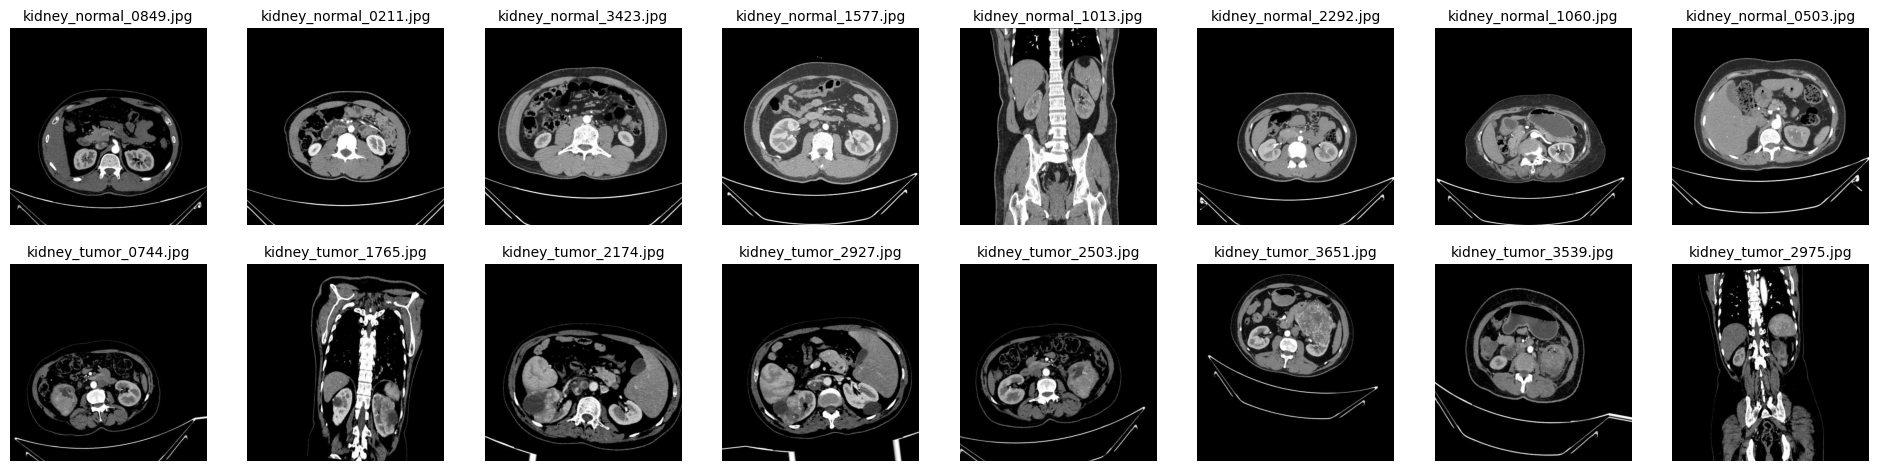

In [12]:
nrows = 8
ncols = 8
plt.figure(figsize=(24,24))

random_images = 8

# Select random images from train normal kidney directory
normal_pic = random.sample(train_normal_names, random_images)
normal_kidney_pic = [os.path.join(train_normal_dir, i) for i in normal_pic]

# Select random images from train normal kidney directory
tumor_pic = random.sample(train_tumor_names, random_images)
tumor_kidney_pic = [os.path.join(train_tumor_dir, i) for i in tumor_pic]

# Merge the selected images into total_images list
total_images = normal_kidney_pic + tumor_kidney_pic

# Print the merged list of images
print(total_images)

for i in range(0,len(total_images)):
  data = total_images[i].split('/',3)[3]
  plot = plt.subplot(8,8,i+1)
  plot.axis('Off')
  image = mpimg.imread(total_images[i])
  plot.set_title(data,fontsize=10)
  plt.imshow(image)

plt.show()



## Step 5 : Data Augmentation and Generators for Training, Testing, and Validation

In [13]:
trainDatagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.05,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.2
)

validDatagen=ImageDataGenerator(rescale=1./255)

testDatagen=ImageDataGenerator(rescale=1./255)

train_generator= trainDatagen.flow_from_directory(train_dir,
                                                   class_mode='binary',
                                                   batch_size=32,
                                                   target_size=(224,224),
                                                   subset='training')
validation_generator= trainDatagen.flow_from_directory(train_dir,
                                                       class_mode='binary',
                                                       batch_size=32,
                                                       target_size=(224,224),
                                                       subset='validation')
test_generator=testDatagen.flow_from_directory(test_dir,
                                                class_mode='binary',
                                                batch_size=32,
                                                target_size=(224,224))

Found 6400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [14]:
train_generator.class_indices

{'kidney_normal': 0, 'kidney_tumor': 1}

In [15]:
validation_generator.image_shape

(224, 224, 3)

In [16]:
image_size = (224,224,3)

model = Sequential()
model.add(Conv2D(32,(3,3),activation = "relu", input_shape = image_size))
model.add(MaxPooling2D(pool_size = (4,4)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(units=256, activation = 'relu'))
model.add(Dense(units=128, activation = 'relu'))

model.add(Dense(units=1, activation = 'sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 55, 55, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 55, 55, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 53, 53, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 26, 26, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 26, 26, 32)        0

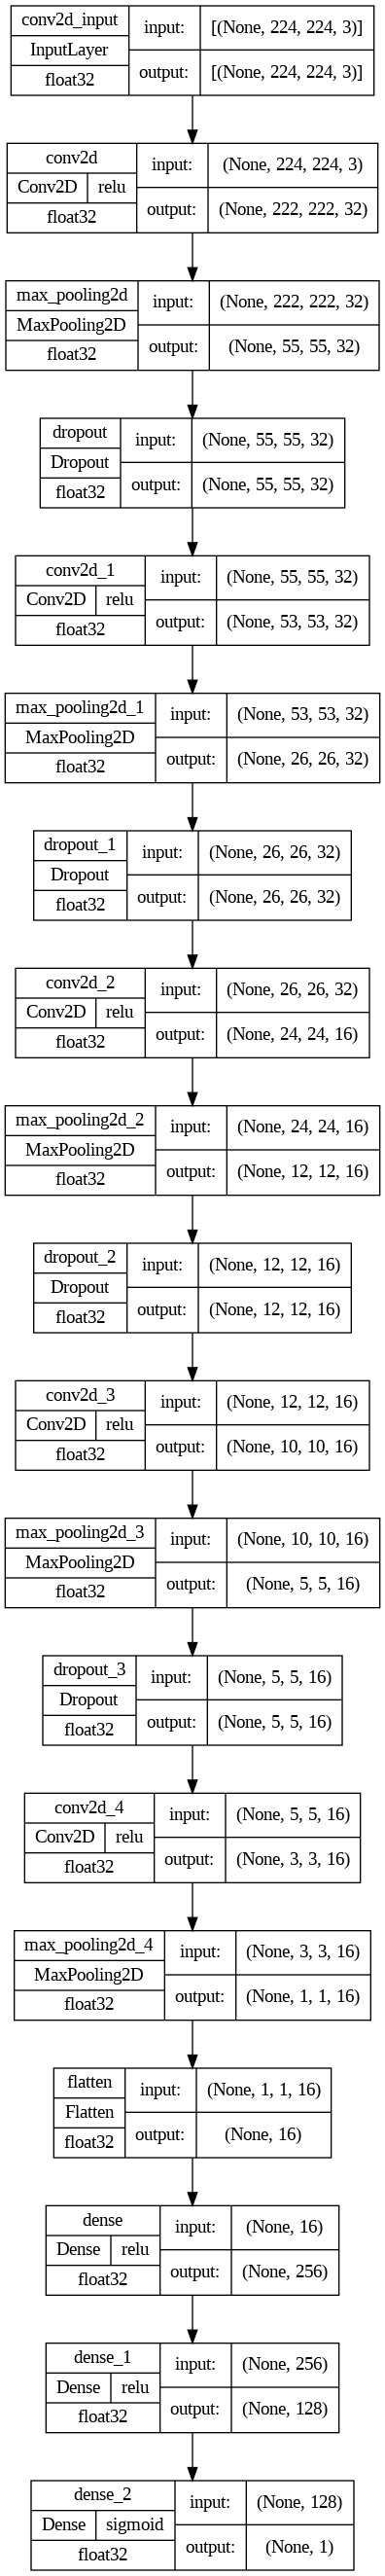

In [18]:
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)

In [19]:
model.compile(Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
history = model.fit(train_generator,
                    epochs = 50,
                    validation_data = validation_generator,
                    callbacks=[early_stopping]
                    )

Epoch 1/50
200/200 [==============================] - 106s 465ms/step - loss: 0.6907 - accuracy: 0.5153 - val_loss: 0.6887 - val_accuracy: 0.7400
Epoch 2/50
200/200 [==============================] - 93s 465ms/step - loss: 0.6215 - accuracy: 0.6737 - val_loss: 0.5268 - val_accuracy: 0.8637
Epoch 3/50
200/200 [==============================] - 92s 462ms/step - loss: 0.5238 - accuracy: 0.7653 - val_loss: 0.4951 - val_accuracy: 0.8694
Epoch 4/50
200/200 [==============================] - 93s 463ms/step - loss: 0.4960 - accuracy: 0.7819 - val_loss: 0.4799 - val_accuracy: 0.8944


In [ ]:
history.history.keys()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['trainig','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

In [ ]:
model.save('model.keras')

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report

# Initialize empty lists to store predicted and true labels
y_test = []
y_actual = []

# Directory paths for Melanoma and malignant images
normal_dir = "/content/Kidney Cancer/Test/kidney_normal/"
tumor_dir = "/content/Kidney Cancer/Test/kidney_tumor/"
sum=0
# Define a function to load and preprocess images
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0  # Rescale to match the training data preprocessing
    return img

# Iterate through normal images
for i in os.listdir(normal_dir):
    print(i)
    sum=sum+1
    img_path = os.path.join(normal_dir, i)
    img = load_and_preprocess_image(img_path)
    p = model.predict(img)
    predicted_class = 1 if p[0, 0] > 0.5 else 0
    y_test.append(predicted_class)
    y_actual.append(0)  # 0 for normal class

print(sum)

# Iterate through tumor images
for i in os.listdir(tumor_dir):
    img_path = os.path.join(tumor_dir, i)
    img = load_and_preprocess_image(img_path)
    p = model.predict(img)
    predicted_class = 1 if p[0, 0] > 0.5 else 0
    y_test.append(predicted_class)
    y_actual.append(1) #1 for tumor class

print(y_test)
print(y_actual)

In [ ]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_actual,y_test)


In [ ]:
import seaborn as sns
sns.heatmap(cm,cmap='plasma',fmt="d",annot=True)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_actual,y_test))

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files
import cv2
uploaded = files.upload()

for fname in uploaded.keys():
      img_path = '/content/' + fname
      img = image.load_img(img_path, target_size=(224, 224))  # Adjust the target size if needed
      img_array = image.img_to_array(img)
      img_array = np.expand_dims(img_array, axis=0)
      img_array /= 255.0  # Rescale to match the training data preprocessing

        # Make predictions using the provided model
      prediction = model.predict(img_array)

        # Determine the class label based on the prediction
      if prediction[0, 0] > 0.5:
          class_label = 'Tumor'
      else:
          class_label = 'Normal'

        # Display the uploaded image and prediction
      plt.imshow(img)
      plt.axis('off')
      plt.title(f'Predicted Class: {class_label}')
      plt.show()